# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Фронт работы:**
1. Подготовить данные для обучения моделей
2. Изучить дисбаланс классов и обучить модели без учета дисбаланса
3. Сбалансировать дисбаланс классов тремя способами, обучить модели для каждого способа и выявить лучшие
4. Провести тестирование лучших моделей и выбрать те, что проходят по условию F1-меры >= 0.59
5. Сделать вывод о проделанной работе и полученных результатах.

## Подготовка данных

In [1]:
#Устанавливаем библиотеки
!pip install scikit-learn==1.1.3
!pip install fast_ml --quiet

In [2]:
#Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
from fast_ml.model_development import train_valid_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, roc_auc_score, recall_score
from sklearn.dummy import DummyClassifier

In [3]:
#Записываем датасет в переменную
df = pd.read_csv('/datasets/Churn.csv')

#Изучим таблицу
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [4]:
#Изучим данные
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Есть 3 столбца, не влияющих на обучение модели: `RowNumber`, `CustomerId` и `Surname` — удалим их, но сперва убедимся, что нет явных дубликатов по столбцу `CustomerID`

In [5]:
#Проверяем наличие явных дубликатов
len(df['CustomerId'].unique())

10000

Дубликатов нет, можем удалять лишние столбцы.

In [6]:
#Удаляем
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

#Проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           9091 non-null   float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


В столбце `Tenure` есть пропуски, но их менее 10% от общего числа строк, значит, можем их удалить, чтобы не заполнять медианными значениями и не путать модель в процессе обучения.

In [7]:
#Удаляем пропуски
df = df.dropna().reset_index(drop=True)

#Проверяем
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9091 entries, 0 to 9090
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9091 non-null   int64  
 1   Geography        9091 non-null   object 
 2   Gender           9091 non-null   object 
 3   Age              9091 non-null   int64  
 4   Tenure           9091 non-null   float64
 5   Balance          9091 non-null   float64
 6   NumOfProducts    9091 non-null   int64  
 7   HasCrCard        9091 non-null   int64  
 8   IsActiveMember   9091 non-null   int64  
 9   EstimatedSalary  9091 non-null   float64
 10  Exited           9091 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 781.4+ KB


In [8]:
#Делим выборки
features_train, target_train, features_valid, target_valid,\
features_test, target_test = train_valid_test_split(
    df,
    target = 'Exited',
    train_size=0.6,
    valid_size=0.2,
    test_size=0.2,
    random_state=12345)

#Проверяем результат
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)
print(target_train.shape)
print(target_valid.shape)
print(target_test.shape)

display(features_train)

(5454, 10)
(1818, 10)
(1819, 10)
(5454,)
(1818,)
(1819,)


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8483,727,France,Female,28,2.0,110997.76,1,1,0,101433.76
3431,537,France,Male,26,7.0,106397.75,1,0,0,103563.23
6770,610,France,Male,40,9.0,0.00,1,1,1,149602.54
1350,576,France,Male,36,6.0,0.00,2,1,1,48314.00
4047,549,France,Male,31,4.0,0.00,2,0,1,25684.85
...,...,...,...,...,...,...,...,...,...,...
4478,773,Germany,Male,34,10.0,126979.75,1,0,0,36823.28
4094,664,France,Female,44,8.0,142989.69,1,1,1,115452.51
3492,547,France,Female,29,6.0,104450.86,1,1,1,37160.28
2177,556,France,Female,52,9.0,0.00,1,1,0,175149.20


Применим OHE к категориальным признакам `Geography` и `Gender`

In [9]:
#Обучаем OHE на тренировочной выборке
ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)
ohe.fit(features_train[['Gender', 'Geography']])

#Применяем OHE к выборкам
features_train_ohe = pd.DataFrame(ohe.transform(features_train[['Gender', 'Geography']]),
                                  columns=ohe.get_feature_names(['Gender', 'Geography']),
                                  index=features_train.index)
features_valid_ohe = pd.DataFrame(ohe.transform(features_valid[['Gender', 'Geography']]),
                                  columns=ohe.get_feature_names(['Gender', 'Geography']),
                                  index=features_valid.index)
features_test_ohe = pd.DataFrame(ohe.transform(features_test[['Gender', 'Geography']]),
                                  columns=ohe.get_feature_names(['Gender', 'Geography']),
                                  index=features_test.index)

#Удаляем старые столбцы
features_train = features_train.drop(['Gender', 'Geography'], axis=1)
features_valid = features_valid.drop(['Gender', 'Geography'], axis=1)
features_test = features_test.drop(['Gender', 'Geography'], axis=1)

#Объединяем закодированные и числовые признаки
features_train = pd.concat([features_train_ohe, features_train], axis=1)
features_valid = pd.concat([features_valid_ohe, features_valid], axis=1)
features_test = pd.concat([features_test_ohe, features_test], axis=1)

In [10]:
#Проверяем
display(features_train.head())
display(features_valid.head())
display(features_test.head())

,Gender_Male,Geography_Germany,Geography_Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8483,0.0,0.0,0.0,727,28,2.0,110997.76,1,1,0,101433.76
3431,1.0,0.0,0.0,537,26,7.0,106397.75,1,0,0,103563.23
6770,1.0,0.0,0.0,610,40,9.0,0.00,1,1,1,149602.54
1350,1.0,0.0,0.0,576,36,6.0,0.00,2,1,1,48314.00
4047,1.0,0.0,0.0,549,31,4.0,0.00,2,0,1,25684.85


,Gender_Male,Geography_Germany,Geography_Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6754,0.0,0.0,0.0,516,45,4.0,0.00,1,1,0,95273.73
7828,0.0,0.0,0.0,768,40,8.0,0.00,2,0,1,69080.46
1545,1.0,1.0,0.0,730,45,6.0,152880.97,1,0,0,162478.11
4935,1.0,0.0,0.0,751,29,1.0,135536.50,1,1,0,66825.33
8176,1.0,0.0,1.0,688,32,6.0,124179.30,1,1,1,138759.15


,Gender_Male,Geography_Germany,Geography_Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4684,0.0,0.0,0.0,814,31,4.0,0.00,2,1,1,142029.17
3773,1.0,1.0,0.0,607,36,10.0,106702.94,2,0,0,198313.69
6665,1.0,1.0,0.0,632,42,6.0,59972.26,2,0,1,148172.94
6777,0.0,0.0,0.0,686,35,8.0,105419.73,1,1,0,35356.46
3143,0.0,1.0,0.0,538,42,1.0,98548.62,2,0,1,94047.75


Теперь все признаки количественные и с ними можно работать для обучения моделей.

Приводить названия столбцов к змеиному регистру не будем, т.к. нам потребуется название всего 1 столбца и ровно 1 раз — при делении датафрейма на выборки. Сделаем это прямо сейчас — разобьем данные на обучающие, валидационные и тестовые выборки.

Теперь масштабируем признаки для дальнейшего обучения моделей.

In [11]:
#Добавляем столбцы для масштабирования
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

#Обучаем scaler на тренировочных признаках
scaler = StandardScaler()
scaler.fit(features_train[numeric])

#Масштабируем признаки
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

#Проверяем
display(features_train[numeric].head())
display(features_valid[numeric].head())
display(features_test[numeric].head())

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
8483,0.809075,-1.039327,-1.025995,0.554904,-0.908179,0.019508
3431,-1.152518,-1.227561,0.696524,0.480609,-0.908179,0.056167
6770,-0.398853,0.090079,1.385532,-1.237830,-0.908179,0.848738
1350,-0.749875,-0.286389,0.352020,-1.237830,0.809300,-0.894953
4047,-1.028628,-0.756975,-0.336987,-1.237830,0.809300,-1.284516


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
6754,-1.369326,0.560665,-0.336987,-1.237830,-0.908179,-0.086537
7828,1.232367,0.090079,1.041028,-1.237830,0.809300,-0.537457
1545,0.840048,0.560665,0.352020,1.231363,-0.908179,1.070393
4935,1.056856,-0.945210,-1.370498,0.951231,-0.908179,-0.576279
8176,0.406433,-0.662858,0.352020,0.767800,-0.908179,0.662068


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
4684,1.707279,-0.756975,-0.336987,-1.237830,0.809300,0.718362
3773,-0.429826,-0.286389,1.730036,0.485538,0.809300,1.687305
6665,-0.171721,0.278313,0.352020,-0.269213,0.809300,0.824128
6777,0.385784,-0.380507,1.041028,0.464813,-0.908179,-1.118018
3143,-1.142194,0.278313,-1.370498,0.353837,0.809300,-0.107642


### Вывод:

Мы изучили и подготовили данные к дальнейшей работе:
1. Изучили структуру данных;
2. Удалили лишние столбцы;
3. Удалили данные с пропусками;
4. Применили прямое кодирование (OHE) к категориальным признакам;
5. Разделили данные на обучающие, валидационные и тестовые выборки;
6. Масштабировали признаки.

Теперь мы готовы приступить к исследованию баланса классов и обучению моделей.

## Исследование задачи

Исследуем баланс классов целевого признака

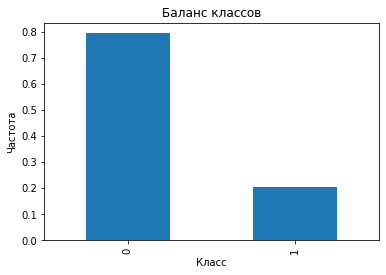

In [12]:
target_class_frequency = target_train.value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Класс')
plt.ylabel('Частота')
plt.title('Баланс классов')
plt.show()

Наблюдается сильный дисбаланс классов — 79% к 21%.

### Обучение моделей без учета дисбаланса классов

Теперь обучим три модели без учета дисбаланса классов.

In [13]:
#Обучим дерево решений
best_tree_model = None
best_tree_f1 = 0

#Определяем оптимальную модель
for depth in range(1, 11):
    for leaf in range(1, 10):
        model = DecisionTreeClassifier(
            random_state=12345,
            criterion='entropy',
            max_depth=depth,
            min_samples_leaf=leaf)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_tree_f1:
            best_tree_model = model
            best_tree_f1 = f1
            
print(f'Лучшая модель: {best_tree_model}')
print(f'Лучшая F1-мера дерева решений: {best_tree_f1:.3}')

Лучшая модель: DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=2,
                       random_state=12345)
Лучшая F1-мера дерева решений: 0.583


По условию задачи необходимо довести F1-меру на тестовой выборке до 0.59, а наш лучший результат на валидационной выборке 0.583 — дерево решений не подходит. Посмотрим, как справится случайный лес.

In [14]:
#Обучим случайный лес
best_forest_model = None
best_forest_f1 = 0

#Определяем оптимальную модель
for depth in range(1, 11):
    for est in range(1, 101, 10):
        for leaf in range(1, 10):
            model = RandomForestClassifier(
                random_state=12345,
                max_depth=depth,
                n_estimators=est,
                min_samples_leaf=leaf)
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            f1 = f1_score(target_valid, predictions)
            if f1 > best_forest_f1:
                best_forest_f1 = f1
                best_forest_model = model

print(f'Лучшая модель: {best_forest_model}')            
print(f'Лучшая F1-мера случайного леса: {best_forest_f1:.3}')

Лучшая модель: RandomForestClassifier(max_depth=9, min_samples_leaf=8, n_estimators=11,
                       random_state=12345)
Лучшая F1-мера случайного леса: 0.589


Лучшая модель случайного леса выдала F1-меру 0.589, такая модель близка, но не подходит по условию задачи.

In [15]:
#Обучим логистическую регрессию
best_regression_model = None
best_regression_f1 = 0

#Определяем оптимальную модель
for iter in range(1000, 100000, 2000):
    for solver in ['lbfgs', 'liblinear']:
        model = LogisticRegression(
            random_state=12345,
            solver=solver,
            max_iter=iter)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_regression_f1:
            best_regression_f1 = f1
            best_regression_model = model
        
print(f'Лучшая модель: {best_regression_model}')
print(f'Лучшая F1-мера логистической регрессии: {best_regression_f1:.3}')

Лучшая модель: LogisticRegression(max_iter=1000, random_state=12345)
Лучшая F1-мера логистической регрессии: 0.304


Как и в предыдущем проекте, модель логистической регрессии показывает себя гораздо хуже дерева решений и случайного леса — значение F1-меры = 0.304.

### Вывод:
Топ моделей без учета дисбаланса классов выглядит следующим образом:
1. Модель случайного леса показала лучший результат и почти справилась с поставленной задачей — добилась показателя F1-меры в 0.589, хоть и на валидационной выборке, а не на тестовой. Тестовую мы оставили для моделей, учитывающих дисбаланс классов.
2. Модель дерева решений была близка, но также не справилась с задачей, добившись лучшего показателя F1-меры в 0.583.
3. Последнее место за моделью логистической регрессии, показавшей себя провально с результатами F1-меры в 0.304.

## Борьба с дисбалансом

### Балансировка через `class_weight='balanced'`

Займемся решением проблемы дисбаланса классов, после чего проверим модели еще раз.

Для начала проверим, улучшится ли значение F1-мер, если добавить в модели гиперпараметр `class_weight='balanced'`

In [16]:
#Обучим дерево решений
best_tree_model = None
best_tree_f1 = 0

#Определяем оптимальную модель
for depth in range(1, 11):
    for leaf in range(1, 10):
        model = DecisionTreeClassifier(
            random_state=12345,
            criterion='entropy',
            max_depth=depth,
            min_samples_leaf=leaf,
            class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_tree_f1:
            best_tree_model = model
            best_tree_f1 = f1
            
print(f'Лучшая модель: {best_tree_model}')
print(f'Лучшая F1-мера дерева решений: {best_tree_f1:.3}')

Лучшая модель: DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, min_samples_leaf=9, random_state=12345)
Лучшая F1-мера дерева решений: 0.575


F1-мера немного ухудшилась. Такой балансировки будет недостаточно для выполнения условия задачи по достижению показателя в 0.575 на тестовой выборке.

In [17]:
#Обучим случайный лес
best_forest_model = None
best_forest_f1 = 0

#Определяем оптимальную модель
for depth in range(1, 11):
    for est in range(1, 101, 10):
        for leaf in range(1, 10):
            model = RandomForestClassifier(
                random_state=12345,
                max_depth=depth,
                n_estimators=est,
                min_samples_leaf=leaf,
                class_weight='balanced')
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            f1 = f1_score(target_valid, predictions)
            if f1 > best_forest_f1:
                best_forest_f1 = f1
                best_forest_model = model

print(f'Лучшая модель: {best_forest_model}')            
print(f'Лучшая F1-мера случайного леса: {best_forest_f1:.3}')

Лучшая модель: RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=2,
                       n_estimators=71, random_state=12345)
Лучшая F1-мера случайного леса: 0.655


F1-мера значительно улучшилась и составила 0.655. Не терпится проверить модель на тестовой выборке.

In [18]:
#Обучим логистическую регрессию
best_regression_model = None
best_regression_f1 = 0

#Определяем оптимальную модель
for iter in range(1000, 100000, 2000):
    for solver in ['lbfgs', 'liblinear']:
        model = LogisticRegression(
            random_state=12345,
            solver=solver,
            max_iter=iter,
            class_weight='balanced')
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_regression_f1:
            best_regression_f1 = f1
            best_regression_model = model
        
print(f'Лучшая модель: {best_regression_model}')
print(f'Лучшая F1-мера логистической регрессии: {best_regression_f1:.3}')

Лучшая модель: LogisticRegression(class_weight='balanced', max_iter=1000, random_state=12345)
Лучшая F1-мера логистической регрессии: 0.51


F1-мера модели логистической регрессии заметно улучшилась, но все еще остается самой низкой и не проходит по условию.

### Балансировка через upsampling

Проверим еще два способа борьбы с дисбалансом классов:
1. Upsampling;
2. Downsampling.

Начнем с upsampling.

In [19]:
#Пишем функцию
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat(
        [features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat(
        [target_zeros] + [target_ones] * repeat)    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

(8832, 11)
(8832,)


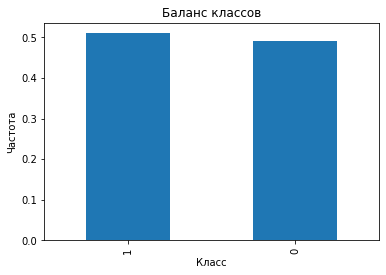

In [20]:
#Применяем
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4)

#Проверяем баланс классов
print(features_upsampled.shape)
print(target_upsampled.shape)

target_frequency_upsampled = target_upsampled\
.value_counts(normalize=True)\
.plot(kind='bar')
plt.xlabel('Класс')
plt.ylabel('Частота')
plt.title('Баланс классов')
plt.show()

Баланс классов значительно улучшился. Обучим модели по сбалансированным выборкам.

In [21]:
#Обучим дерево решений
best_tree_model = None
best_tree_f1 = 0

#Определяем оптимальную модель
for depth in range(1, 11):
    for leaf in range(1, 10):
        model = DecisionTreeClassifier(
            random_state=12345,
            criterion='entropy',
            max_depth=depth,
            min_samples_leaf=leaf)
        model.fit(features_upsampled, target_upsampled)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_tree_f1:
            best_tree_model = model
            best_tree_f1 = f1
            
print(f'Лучшая модель: {best_tree_model}')
print(f'Лучшая F1-мера дерева решений: {best_tree_f1:.3}')

Лучшая модель: DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=9,
                       random_state=12345)
Лучшая F1-мера дерева решений: 0.567


F1-мера дерева решений немного ухудшилась по сравнению с моделью, сбалансированной через `class_weight='balanced'`.

In [22]:
#Обучим случайный лес
best_forest_model = None
best_forest_f1 = 0

#Определяем оптимальную модель
for depth in range(1, 11):
    for est in range(1, 101, 10):
        for leaf in range(1, 10):
                model = RandomForestClassifier(
                    random_state=12345,
                    max_depth=depth,
                    n_estimators=est,
                    min_samples_leaf=leaf)
                model.fit(features_upsampled, target_upsampled)
                predictions = model.predict(features_valid)
                f1 = f1_score(target_valid, predictions)
                if f1 > best_forest_f1:
                    best_forest_f1 = f1
                    best_forest_model = model

print(f'Лучшая модель: {best_forest_model}')            
print(f'Лучшая F1-мера случайного леса: {best_forest_f1:.3}')

Лучшая модель: RandomForestClassifier(max_depth=10, min_samples_leaf=9, n_estimators=71,
                       random_state=12345)
Лучшая F1-мера случайного леса: 0.638


F1-мера немного ниже меры модели с `class_weight='balanced'`.

In [23]:
#Обучим логистическую регрессию
best_regression_model = None
best_regression_f1 = 0

#Определяем оптимальную модель
for iter in range(1000, 100000, 2000):
    for solver in ['lbfgs', 'liblinear']:
        model = LogisticRegression(
            random_state=12345,
            solver=solver,
            max_iter=iter)
        model.fit(features_upsampled, target_upsampled)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_regression_f1:
            best_regression_f1 = f1
            best_regression_model = model
        
print(f'Лучшая модель: {best_regression_model}')
print(f'Лучшая F1-мера логистической регрессии: {best_regression_f1:.3}')

Лучшая модель: LogisticRegression(max_iter=1000, random_state=12345)
Лучшая F1-мера логистической регрессии: 0.509


F1-мера немного ухудшилась по сравнению с моделью с `class_weight='balanced'`

**Вывод:**

Результат неожиданный. Апсемплинг ухудшил результаты всех лучших моделей.

### Балансировка через downsampling

Попробуем downsampling и проверим результаты моделей.

In [24]:
#Пишем функцию
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(
            frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(
            frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

(2251, 11)
(2251,)


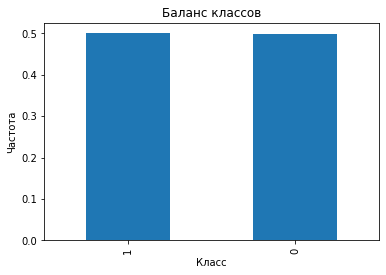

In [25]:
#Применяем функцию
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.26)

#Проверяем баланс классов
target_class_frequency = target_downsampled.value_counts(normalize=True)
print(features_downsampled.shape)
print(target_downsampled.shape)

target_frequency_downsampled = target_downsampled\
.value_counts(normalize=True)\
.plot(kind='bar')
plt.xlabel('Класс')
plt.ylabel('Частота')
plt.title('Баланс классов')
plt.show()

Классы сбалансированы. Обучим модели по сбалансированным выборкам.

In [26]:
#Обучим дерево решений
best_tree_model = None
best_tree_f1 = 0

#Определяем оптимальную модель
for depth in range(1, 11):
    for leaf in range(1, 10):
            model = DecisionTreeClassifier(
                random_state=12345,
                criterion='entropy',
                max_depth=depth,
                min_samples_leaf=leaf)
            model.fit(features_downsampled, target_downsampled)
            predictions = model.predict(features_valid)
            f1 = f1_score(target_valid, predictions)
            if f1 > best_tree_f1:
                best_tree_model = model
                best_tree_f1 = f1
            
print(f'Лучшая модель: {best_tree_model}')
print(f'Лучшая F1-мера дерева решений: {best_tree_f1:.3}')

Лучшая модель: DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=7,
                       random_state=12345)
Лучшая F1-мера дерева решений: 0.593


Даунсемплинг пошел на пользу модели дерева решений.  
F1-мера теперь проходит по условию задачи и составляет 0.593.  

In [27]:
#Обучим случайный лес
best_forest_model = None
best_forest_f1 = 0

#Определяем оптимальную модель
for depth in range(1, 11):
    for est in range(1, 101, 10):
        for leaf in range(1, 10):
            model = RandomForestClassifier(
                random_state=12345,
                max_depth=depth,
                n_estimators=est,
                min_samples_leaf=leaf)
            model.fit(features_downsampled, target_downsampled)
            predictions = model.predict(features_valid)
            f1 = f1_score(target_valid, predictions)
            if f1 > best_forest_f1:
                best_forest_f1 = f1
                best_forest_model = model
                
print(f'Лучшая модель: {best_forest_model}')            
print(f'Лучшая F1-мера случайного леса: {best_forest_f1:.3}')

Лучшая модель: RandomForestClassifier(max_depth=10, min_samples_leaf=6, n_estimators=91,
                       random_state=12345)
Лучшая F1-мера случайного леса: 0.613


F1-мера ухудшилась по сравнению с моделями с `class_weight='balanced'` и апсемплингом.
Использовать эту модель мы не будем, хоть она и проходит по условию.

In [28]:
#Обучим логистическую регрессию
best_regression_model = None
best_regression_f1 = 0

#Определяем оптимальную модель
for iter in range(1000, 100000, 2000):
    for solver in ['lbfgs', 'liblinear']:
        model = LogisticRegression(
            random_state=12345,
            solver=solver,
            max_iter=iter)
        model.fit(features_downsampled, target_downsampled)
        predictions = model.predict(features_valid)
        f1 = f1_score(target_valid, predictions)
        if f1 > best_regression_f1:
            best_regression_f1 = f1
            best_regression_model = model
        
print(f'Лучшая модель: {best_regression_model}')
print(f'Лучшая F1-мера логистической регрессии: {best_regression_f1:.3}')

Лучшая модель: LogisticRegression(max_iter=1000, random_state=12345)
Лучшая F1-мера логистической регрессии: 0.502


Значительных изменений нет, модель по-прежнему не проходит. Забудем о логистической регрессии.

### Вывод:
Мы проверили несколько способов балансировки классов перед обучением моделей и у нас есть 2 модели, проходящие по условию задания — дерево решений с даунсемплингом и случайный лес с балансировкой гиперпараметром `class_weight='balanced'`. Тем не менее, нам нужно выбрать лучшую для тестирования и ей стала модель случайного леса — `RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=2, n_estimators=71, random_state=12345)`

## Тестирование модели

Наконец мы добрались до тестирования лучшей модели на тестовых выборках, приступим.

In [29]:
#Тестируем лучшую модель случайного леса
model = RandomForestClassifier(
    class_weight='balanced',
    max_depth=9,
    min_samples_leaf=2,
    n_estimators=71,
    random_state=12345)
model.fit(features_train, target_train)
predictions = model.predict(features_test)
f1 = f1_score(target_test, predictions)
recall = recall_score(target_test, predictions)
probabilities = model.predict_proba(features_test)
probabilities_one = probabilities[:, 1]

print(f'Лучшая F1-мера случайного леса: {f1:.3}')
print(f'Значение recall случайного леса: {recall:.3}')
print(f'Площадь ROC-кривой: {roc_auc_score(target_test, probabilities_one):.3}')

Лучшая F1-мера случайного леса: 0.607
Значение recall случайного леса: 0.664
Площадь ROC-кривой: 0.859


In [30]:
#Находим F1-меру константной модели
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)

print(f'F1-мера константной модели: {f1_score(dummy_model.predict(features_test), target_test):.3}')

F1-мера константной модели: 0.324


**Решение проходит, F1-мера больше 0.59.** F1-мера нашей модели существенно превосходит F1-меру константной, наша модель работает значительно лучше.

Значение полноты (recall) в 0.664 говорит о верном детектировании 66% клиентов на отток, что не так и много, если подумать — есть над чем работать.  

ROC-AUC = 0.859 говорит о хорошем качестве модели.

### Вывод:
Дерево решений не справилось, а случайный лес наоборот выполнил задачу и набрал необходимую F1-меру в 0.596, тем самым выполнив задачу проекта.

## Общий вывод:

Мы справились с поставленной задачей, в ходе которой сделали следующее:
1. Подготовили данные для обучения моделей — удалили лишние столбцы, строки с пропусками, разделили датафрейм на выборки, применили OHE к категориальным столбцам, масштабировали количественные признаки для обучения моделей;
2. Исследовали дисбаланс классов и обучили три типа моделей без учета дисбаланса классов;
3. Применили три типа балансировки классов: через `class_weight='balanced'`, через *upsampling* и через *downsampling* и обучили по три типа моделей для каждого типа балансировки, выявив лучшую модель для прохождения финального тестирования — случайный лес с балансировкой через `class_weight='balanced'`.
4. Протестировали модель случайного леса с гиперпараметрами `RandomForestClassifier(class_weight='balanced', max_depth=9, min_samples_leaf=2, n_estimators=71, random_state=12345)` и добились значения F1-меры = 0.607 и ROC-AUC = 0.859, что говорит о выполнении задачи по достижению F1-меры в 0.59 и о хорошем качестве модели соответственно.